In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from finsim.data import get_yahoofinance_data

from lppl.fit import LPPLModel

In [2]:
symdf = get_yahoofinance_data('^GSPC', '2022-12-14', '2023-12-14')

[*********************100%***********************]  1 of 1 completed


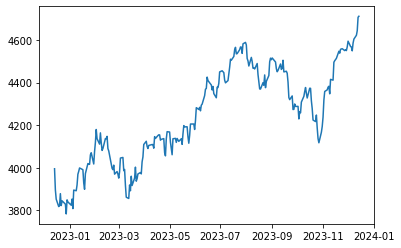

In [3]:
plt.plot(symdf['TimeStamp'], symdf['Close'])

In [4]:
fitted_lppl_model = LPPLModel()
fitted_lppl_model.omega_lo = 6 / (24*3600.)
fitted_lppl_model.omega_hi = 13 / (24*3600.)

fitted_lppl_model.fit(symdf['TimeStamp'].map(lambda ts: ts.timestamp()), symdf['Close'])

In [5]:
print(fitted_lppl_model)

tc: 1759300815.5896707
m: 0.5166233416013388
omega: 0.00010442662685670556
A: 2.9584611624320907
B: 0.002788781390922732
C: 2.6349956781102195
phi: -1.5697863609154725


In [6]:
pd.Timestamp.fromtimestamp(fitted_lppl_model.tc)

Timestamp('2025-10-01 02:40:15.589671')

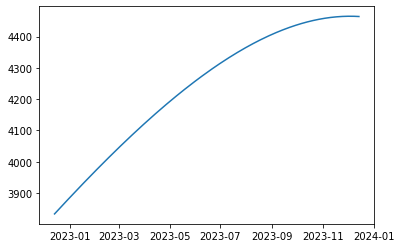

In [7]:
plt.plot(symdf['TimeStamp'], fitted_lppl_model(symdf['TimeStamp'].map(lambda ts: ts.timestamp())))

In [8]:
symdf['TimeStamp'].map(lambda ts: ts.timestamp()).map(lambda f: pd.Timestamp.fromtimestamp(f))

Date
2022-12-14   2022-12-13 19:00:00
2022-12-15   2022-12-14 19:00:00
2022-12-16   2022-12-15 19:00:00
2022-12-19   2022-12-18 19:00:00
2022-12-20   2022-12-19 19:00:00
                     ...        
2023-12-08   2023-12-07 19:00:00
2023-12-11   2023-12-10 19:00:00
2023-12-12   2023-12-11 19:00:00
2023-12-13   2023-12-12 19:00:00
2023-12-14   2023-12-13 19:00:00
Name: TimeStamp, Length: 252, dtype: datetime64[ns]